In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random as random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [ ]:
# 1. Importar o dataset
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()



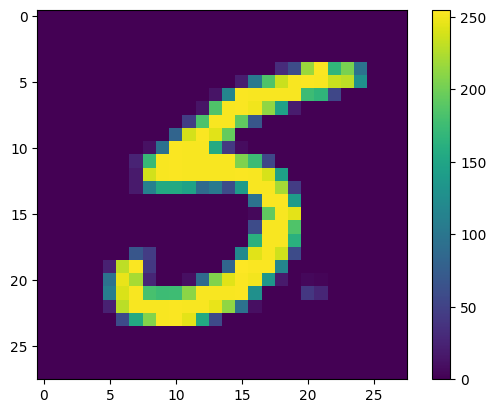

In [ ]:
# 2. Mostrar dados de exemplo
plt.figure()
plt.imshow(random.choice(train_data))
plt.colorbar()
plt.grid(False)
plt.show()



In [ ]:
# 3. Criar o modelo da rede neural
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Lambda(lambda x : x / 255.0),
        tf.keras.layers.Dense(56, activation="sigmoid"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)



In [ ]:
# 4. Compilar o modelo
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)



In [ ]:
# 5. Ajustar o modelo
history = model.fit(train_data, train_labels, epochs=10, verbose=0)



In [ ]:
# 6. Avaliar o modelo
loss, accuracy = model.evaluate(test_data, test_labels)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9017 - loss: 0.3518


<Axes: >

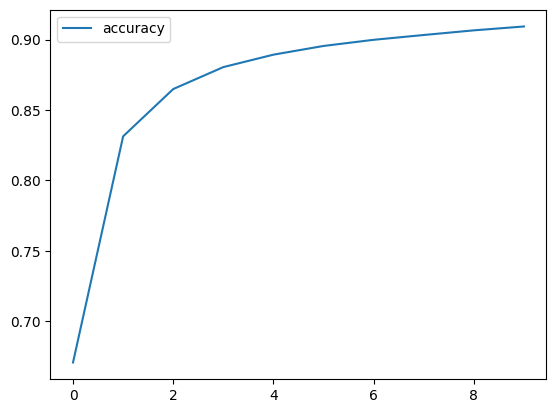

In [ ]:
# 7. Plotar o histórico do treinamento
pd.DataFrame(history.history)[["accuracy"]].plot()



In [ ]:
# 8. Prever os dados de teste
test_preds = model.predict(test_data)

test_labels.shape, test_preds.shape

test_preds_sparse = tf.argmax(test_preds, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# 9. Cálculo da Matriz de Confusão
matrix = confusion_matrix(test_labels, test_preds_sparse)



In [ ]:
# 10. Calculat VP, FN, FP, VN para cada classe
VP = matrix.diagonal()  # Diagonal contains the True Positives for each class
FP = matrix.sum(axis=0) - VP  # False positives are column sums minus VP
FN = matrix.sum(axis=1) - VP  # False negatives are row sums minus VP
VN = matrix.sum() - (FP + FN + VP)  # Total sum minus the other values

# Imprimir valores
print(f"VP: {VP}")
print(f"FN: {FN}")
print(f"FP: {FP}")
print(f"VN: {VN}")



VP: [ 959 1103  911  925  918  753  904  943  851  887]
FN: [ 21  32 121  85  64 139  54  85 123 122]
FP: [ 64  47  77 117 114  74  72  76 111  94]
VN: [8956 8818 8891 8873 8904 9034 8970 8896 8915 8897]


In [ ]:
# 11. Calcular métricas
# Acurácia
acuracia = (VP.sum() + VN.sum()) / matrix.sum()
# Sensibilidade (Recall)
sensibilidade = VP.sum() / (VP.sum() + FN.sum())
# Especificidade
especificidade = VN.sum() / (VN.sum() + FP.sum())
# Precisão
precisao = VP.sum() / (VP.sum() + FP.sum())
# F-Score
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

# Imprimir resultados
print(f"Acurácia: {acuracia}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")
print(f"Precisão: {precisao}")
print(f"F-Score: {f_score}")



Acurácia: 9.8308
Sensibilidade (Recall): 0.9154
Especificidade: 0.9906
Precisão: 0.9154
F-Score: 0.9154


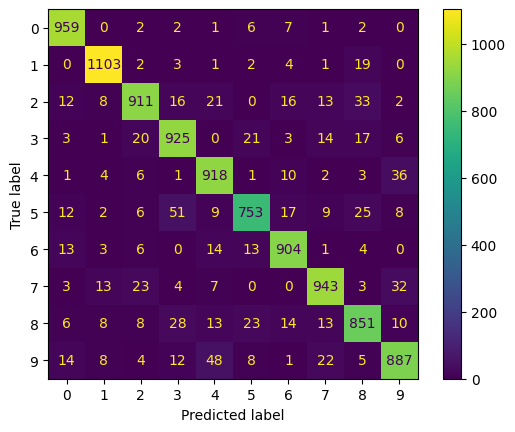

In [ ]:
# 12. Visualizar a matriz de confusão
ConfusionMatrixDisplay.from_predictions(test_labels, test_preds_sparse)
plt.show()





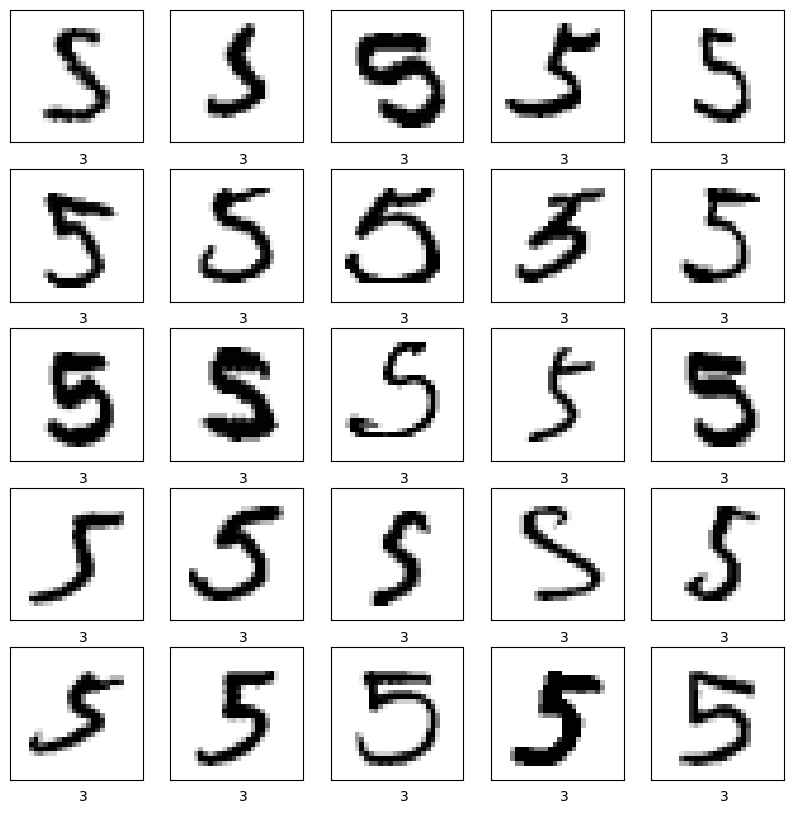

In [ ]:
# 13. Exemplo de dados rotulados de forma incorreta
# Funcao para plotar dados rotulaos de forma errada
def plot_wrong_labeled_data(X_test, y_true, y_preds, label_to_check, wrong_label = None):
    wrongs = []
    for i in range(len(X_test)):
        true_label_found = y_true[i] == label_to_check
        wrong_label_found = wrong_label != None and y_preds[i] == wrong_label
        wrong_preds_label = wrong_label == None and y_preds[i] != label_to_check
        if true_label_found and (wrong_label_found or wrong_preds_label):
            wrongs.append((X_test[i], y_preds[i]))

    random.shuffle(wrongs)

    # Imprimir resultados
    plt.figure(figsize=(10,10))
    for i in range(25):
        wrong = wrongs[i]
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(wrong[0], cmap=plt.cm.binary)
        plt.text(14, 32, wrong[1].numpy())
    plt.show()

plot_wrong_labeled_data(test_data, test_labels, test_preds_sparse, 5, 3)